# Introduction to Python and Natural Language Technologies

__Laboratory 05, Data science, Handling text data, Pandas__

__March 11, 2021__

__Judit Ács, Ádám Kovács__


In [76]:
import pandas as pd  # by convention we use the pd alias
%matplotlib inline
import matplotlib
import numpy as np

# make our charts pretier
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

We are going to work with the MovieLens dataset. First, we need to download it. http://grouplens.org/datasets/movielens/

Download the file only if it wasn't before.

In [77]:
import os

data_dir = os.getenv("MOVIELENS")
if data_dir is None:
    data_dir = ""

ml_path = os.path.join(data_dir, "ml.zip")

if not os.path.exists(ml_path):
    print("Download data")
    import urllib
    u = urllib.request.URLopener()
    u.retrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", ml_path)
    print("Data downloaded")

In [78]:
unzip_path = os.path.join(data_dir, "ml-100k")

if not os.path.exists(unzip_path):
    print("Extracting data")
    from zipfile import ZipFile
    with ZipFile(ml_path) as myzip:
        myzip.extractall(data_dir)
    print("Data extraction done")
        
data_dir = unzip_path

## Importing and preprocessing the data

In [79]:
column_names = [
    "movie_id", "title", "release_date", "video_release_date", "imdb_url", "unknown", "action", "adventure", "animation",
    "children", "comedy", "crime", "documentary", "drama", "fantasy", "film_noir", "horror", "musical", "mystery",
    "romance", "sci_fi", "thriller", "war", "western"]

df = pd.read_table(
    os.path.join(data_dir, "u.item"), sep="|",
    names=column_names, encoding="latin1", index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We have two columns representing dates: release_date, video_release_date. Pandas can parse dates in multiple ways, we only need to give the columns in the parse_dates parameter. Note that null values changed from Nan (not a number) to NaT (not a time).

In [80]:
df = pd.read_table(os.path.join(data_dir, "u.item"), sep="|",
                   names=column_names, encoding="latin1",
                   parse_dates=[2,3], index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),1995-01-01,NaT,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Our solution is still not perfect, because after the title of the movies, the date is present in parentheses. We need to get rid of them, because this information is redundant and generates noise in the DataFrame.

Regular expressions can be used to delete the date between the parentheses. After we delete the remaining whitespaces as well (the strip function deletes the whitespaces in the beginning and in the end of the string as well). Finally we can use our new stripped title instead of the old one.

In [81]:
df.title = df.title.str.replace(r'\(.*\)', '').str.strip()

c:\users\mounir\anaconda3\envs\lane\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


The video_release_date attribute contains invalid information in the first fields. We need to check that it contains valid information before using it. We can list those fields where the video_release value is not NaT (not invalid value).

In [82]:
df[df.video_release_date.notnull()]

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,


In [83]:
df = df.drop('video_release_date', axis=1)
df.head()

,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat,1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [84]:
df = df.drop('unknown', axis=1)

df['year'] = df.release_date.dt.year

# 1. Simple queries

## 1.1. How many action movies were released before 1985? How many were released in 1985 or after 1985?

In [85]:
def count_movies_before_1985(df):
    df_action = df[df.action == 1]
    df_action = df_action[df_action.year < 1985]
    return len(df_action)
    
def count_movies_after_1984(df):
    mydf = df[df.action == 1]
    mydf = mydf[mydf.year >= 1985]
    return len(mydf)
    raise NotImplementedError()

In [86]:
before = count_movies_before_1985(df)
print(before)
assert type(before) == int

after = count_movies_after_1984(df)
print(after)
assert type(after) == int

26
225


## 1.2. Is there a thriller movie for children? Search for an example and retrieve the title of the movie.

In [87]:
def child_thriller(df):
    mydf = df[(df.children == 1) & (df.thriller == 1)]
    title_movie = mydf.iloc[0]['title']
    return title_movie
    raise NotImplementedError()

In [88]:
child_thriller(df)

'Transformers: The Movie, The'

In [89]:
title = child_thriller(df)
assert type(title) == str

## 1.3. How many movies have longer title than 30 character?

In [90]:
def long_titles(df):
    df_title=df[(df.title.str.len()>30)]
    return len(df_title)
    raise NotImplementedError()

In [91]:
title_cnt = long_titles(df)
assert type(title_cnt) == int

# Task 2: grouping and visualization

## 2.1. Group the comedies by year. Visualize how many comedies were relesead annually in a bar chart.

In [92]:
def comedy_by_year(df):
    mydf = df[df.comedy == 1]
    mydf = mydf.groupby('year')
    mydf.size().plot(kind='bar')
    return mydf
    raise NotImplementedError()

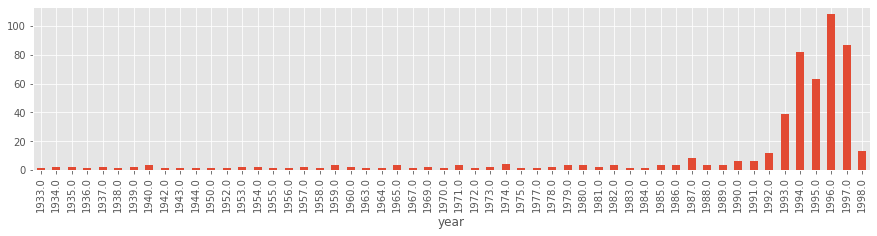

In [93]:
c = comedy_by_year(df)
assert type(c) == pd.core.groupby.DataFrameGroupBy

## 2.2. Visualize the distribution of the release days (days of the month) in a pie chart! 

In [94]:
def groupby_release_day(df):
    df_1 = df.groupby(df.release_date.dt.day)
    df_1.size().plot(kind='pie')
    
    return df_1
    raise NotImplementedError()

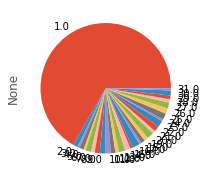

In [95]:
by_day = groupby_release_day(df)
assert type(by_day) == pd.core.groupby.DataFrameGroupBy

# a month is 32 days at most
assert len(by_day) < 32

# don't group by the weekdays
assert len(by_day) > 7

## 2.3. We want to make a traditional lexicon from the movies. Count the starting letters in the titles of the movies. Visualize it in a pie chart.

### Group the movies by the starting letters.

In [96]:
def groupby_initial_letter(df):
    df_2 = df.groupby(df.title.str[:1])
    df_2.size().plot(kind='pie')
    return df_2
    raise NotImplementedError()

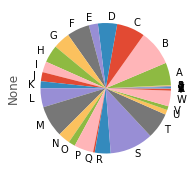

In [61]:
initial = groupby_initial_letter(df)

assert type(initial) == pd.core.groupby.DataFrameGroupBy

# Handling multiple dataframes, e.g.merge

In [62]:
cols = ['user', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join(data_dir, "u.data"), names=cols)

In [63]:
ratings['timestamp'] = pd.to_datetime(ratings.timestamp, unit='s')
ratings.head()

,user,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [64]:
movies = df

In [65]:
ratings = pd.merge(ratings, movies, left_on='movie_id', right_index=True)
ratings.head()

,user,movie_id,rating,timestamp,title,release_date,imdb_url,action,adventure,animation,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
0,196,242,3,1997-12-04 15:55:49,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
253,63,242,3,1997-10-01 23:06:30,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
629,226,242,5,1998-01-04 04:37:51,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1232,154,242,3,1997-11-10 05:03:55,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
2159,306,242,5,1997-10-10 17:16:33,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0


# Task 3: merge

## Q3.1. How many movies got a rating greater than 4 atleast once?

WARNING! The title of a movie is not necessarily unique!

In [66]:
def count_greater_than_4(ratings):
    ratings_1 = ratings.drop_duplicates(subset=['movie_id'])
    ratings_1 = ratings[ratings.rating > 4]
    return len(ratings_1)
    raise NotImplementedError()

In [67]:
greater = count_greater_than_4(ratings)

assert type(greater) == int
assert greater != 1160  # titles are NOT UNIQUE

## Q3.2. All of the ratings contain a timestamp. What is the average of the ratings by the weekdays?
What are the days when the people are kinder?

Hint: look at the `dt` namespace (dt.weekday).

In [68]:
def rating_mean_by_weekday(ratings):
    mydf = ratings.groupby(ratings.timestamp.dt.weekday)
    mydf = mydf.mean()
    mydf = mydf['rating']
    return mydf
    raise NotImplementedError()

In [69]:
weekday_mean = rating_mean_by_weekday(ratings)

assert type(weekday_mean) == pd.Series
assert type(weekday_mean) != pd.DataFrame  # only one column is needed

# ===================== PASSING LEVEL ======================

## \*2. Write function, that groups by multiple columns and returns the biggest group.

Hint: the `GroupBy` object's `get_group` function returns a group.

In [70]:
def get_largest_group(df, groupby_columns):
    # YOUR CODE HERE
    raise NotImplementedError()

In [71]:
genres = ["drama"]
drama_largest = get_largest_group(df, genres)

assert type(drama_largest) == pd.DataFrame
assert len(drama_largest) == 957

genres = ["drama", "comedy"]
both_largest = get_largest_group(df, genres)

# the labels are the same in the comedies and dramas
assert both_largest[["comedy", "drama"]].nunique().loc["comedy"] == 1
assert both_largest[["comedy", "drama"]].nunique().loc["drama"] == 1
print(both_largest.shape)

NotImplementedError: 

# Task 4: Users DataFrame

## 4.1 Read in the u.user file into a DataFrame named `users`.

The columns: `user_id, age, gender, occupation, zip`. The column `user_id` should be the id of the `DataFrame`.

In [ ]:
# users = ...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert type(users) == pd.DataFrame

# user_id starts from 1
assert 0 not in users.index

In [ ]:
# ratings = ratings.merge...
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert type(ratings) == pd.DataFrame
assert ratings.shape == (100000, 30)

## 4.2. What is the count of the ratings given by people with occupation pgrogrammer and marketing? Visualize it by the hours of a day (24h). 

Hint:

1. use the `timestamp` field from the rating table,
1. you can use two cells for the solution,
1. how many slice the pie chart will have.

Implement a function that returns a given occupation's ratings by hour.

In [ ]:
def occupation_cnt_by_hour(ratings, occupation):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
marketing = occupation_cnt_by_hour(ratings, "marketing")
assert type(marketing) == pd.Series

# 24h is in a day
assert len(marketing) < 25

###  Visualize the marketers and the programmers rating hours.

First the marketers:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
programmer = occupation_cnt_by_hour(ratings, "programmer")

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# ===================== EXTRA LEVEL ======================